In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [228]:
df=pd.read_csv("manufacturing_data.csv")

# Preprocessing & EDA

In [229]:
df.shape

(1197, 15)

In [230]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [231]:
df['styleChangeCount'].value_counts()

styleChangeCount
No Style Change         1050
Minor Style Revision     114
Major Design Shift        33
Name: count, dtype: int64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [233]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


In [234]:
df.isnull().sum()

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

### Selecting all rows where the production department is Stitching Unit

In [235]:
# df = df[df['workInProgress'].notnull()]   # Selecting rows where the workInProgress column has some value
df = df[df['productionDept'] == 'Stitching Unit']
df = df.drop('productionDept', axis=1)

In [236]:
df.shape

(691, 14)

### Encoding

In [237]:
df['recordDate'] = pd.to_datetime(df['recordDate'], errors='coerce')

cat_cols = ['fiscalQuarter', 'dayOfWeek', 'team','styleChangeCount']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [238]:
df.head()

,recordDate,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2015-02-24,3,4,9,0.60,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
1,2015-01-19,2,0,4,0.80,11.41,1028.0,4380,50,0.0,0,2,31.0,0.800359
5,2015-02-16,2,0,3,0.80,30.10,461.0,0,0,0.0,0,2,59.0,0.800980
8,2015-01-24,3,1,0,0.65,22.52,1295.0,10170,26,0.0,0,2,56.5,0.650417
9,2015-03-05,0,3,7,0.75,18.79,1228.0,6240,45,0.0,0,2,52.0,0.750396


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1195
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   recordDate           691 non-null    datetime64[ns]
 1   fiscalQuarter        691 non-null    int32         
 2   dayOfWeek            691 non-null    int32         
 3   team                 691 non-null    int32         
 4   plannedEfficiency    691 non-null    float64       
 5   standardMinuteValue  691 non-null    float64       
 6   workInProgress       691 non-null    float64       
 7   overtimeMinutes      691 non-null    int64         
 8   performanceBonus     691 non-null    int64         
 9   idleMinutes          691 non-null    float64       
 10  idleWorkers          691 non-null    int64         
 11  styleChangeCount     691 non-null    int32         
 12  workerCount          691 non-null    float64       
 13  efficiencyScore      691 non-null    fl

In [240]:
df.describe()

,recordDate,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
count,691,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,2015-02-04 07:57:13.285093888,1.386397,2.542692,5.509407,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,1.739508,52.445731,0.722013
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,2015-01-18 00:00:00,0.000000,1.000000,3.000000,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,2.000000,52.000000,0.661470
50%,2015-02-04 00:00:00,1.000000,3.000000,5.000000,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,2.000000,57.000000,0.750608
75%,2015-02-23 00:00:00,2.000000,4.000000,8.000000,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,2.000000,58.000000,0.800402
max,2015-03-11 00:00:00,4.000000,5.000000,11.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.100484
std,NaN,1.206163,1.713328,3.431881,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,0.537185,9.417353,0.154784


In [241]:
# Numerical feature 
num_cols = ['plannedEfficiency', 'standardMinuteValue', 'workInProgress', 
            'overtimeMinutes', 'performanceBonus', 'idleMinutes', 
            'idleWorkers', 'workerCount', 'efficiencyScore']

## Check Outlier in each feature

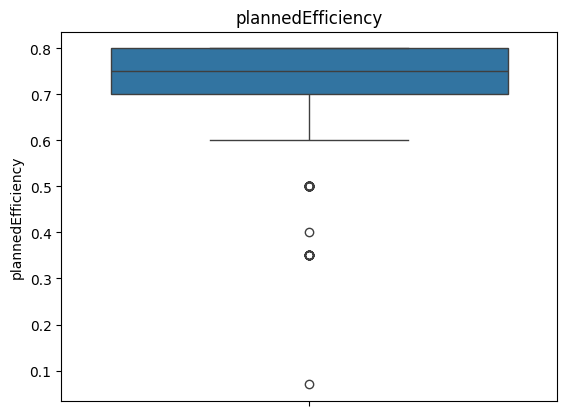

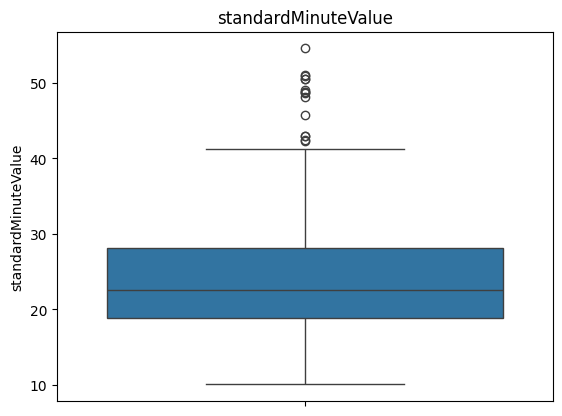

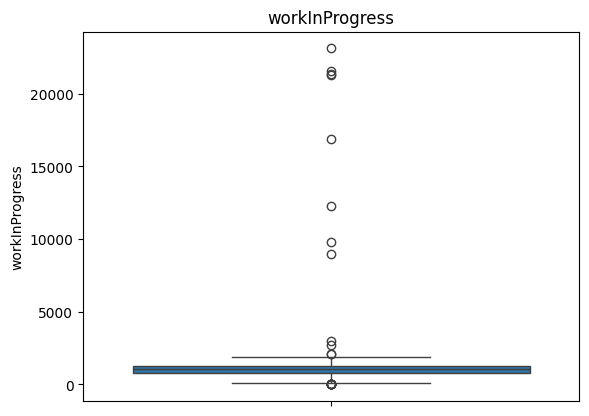

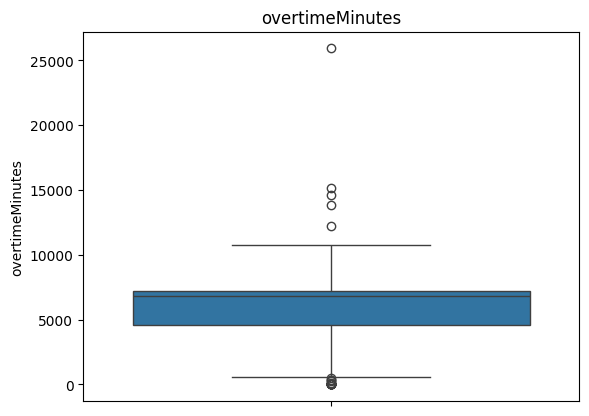

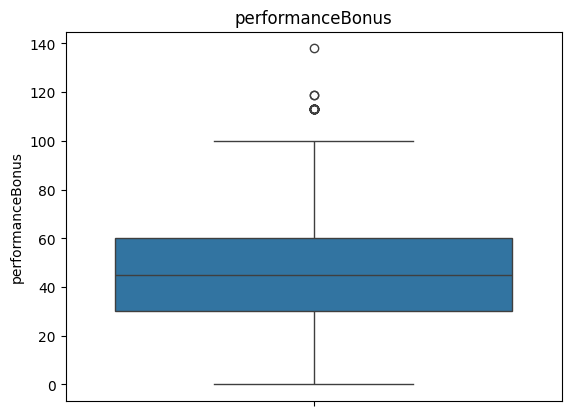

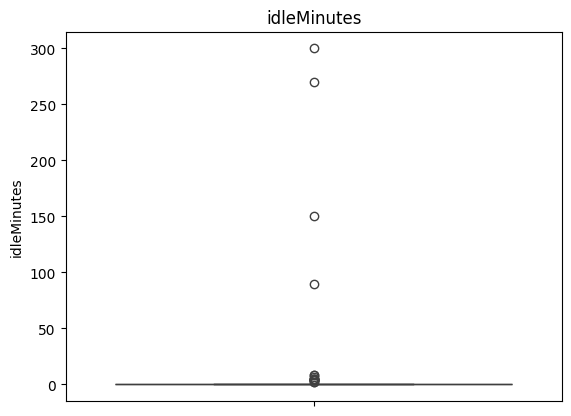

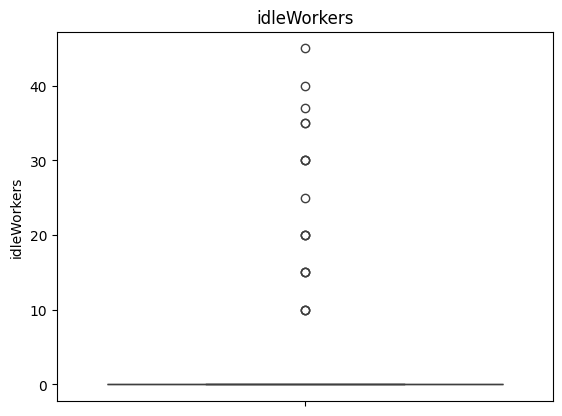

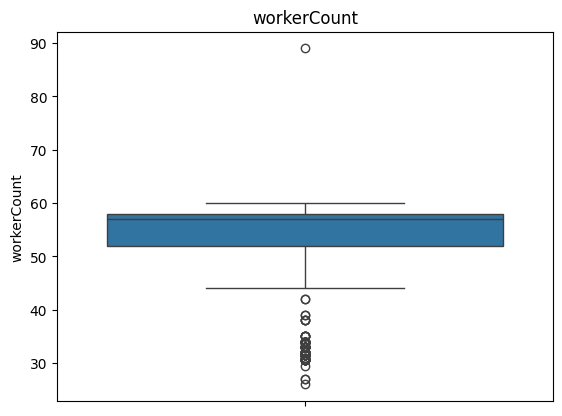

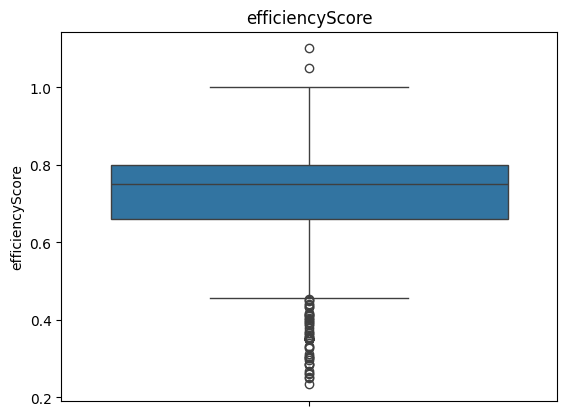

In [242]:
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

## Check Linear Relationships between features

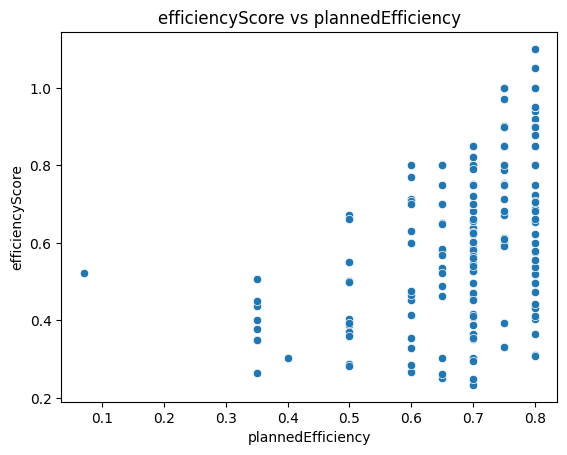

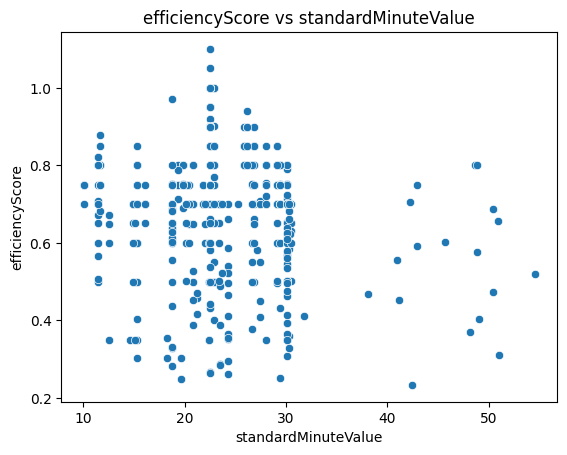

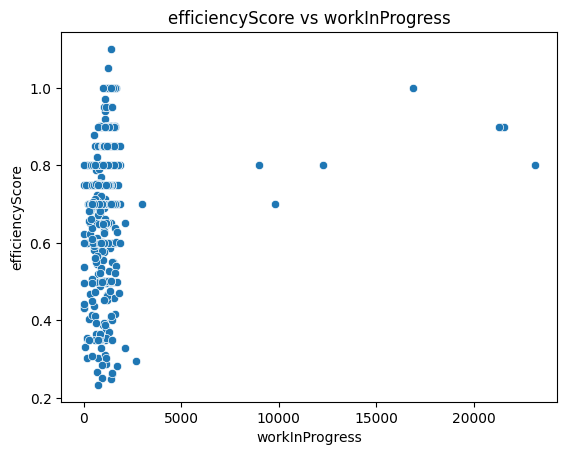

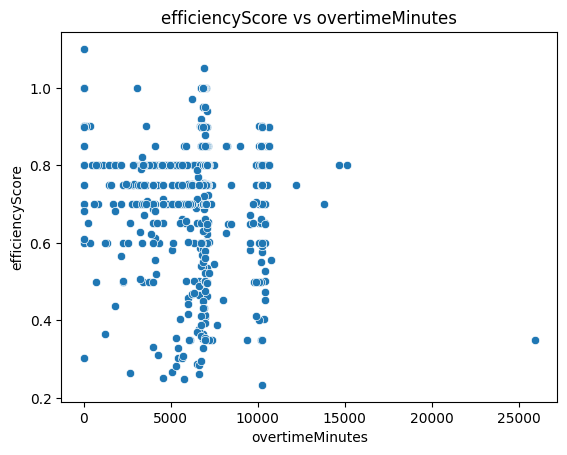

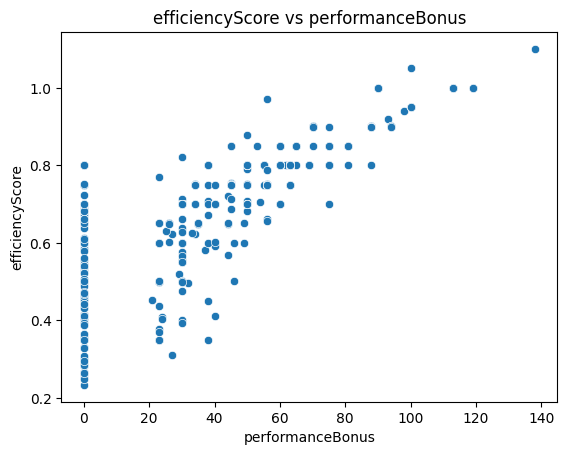

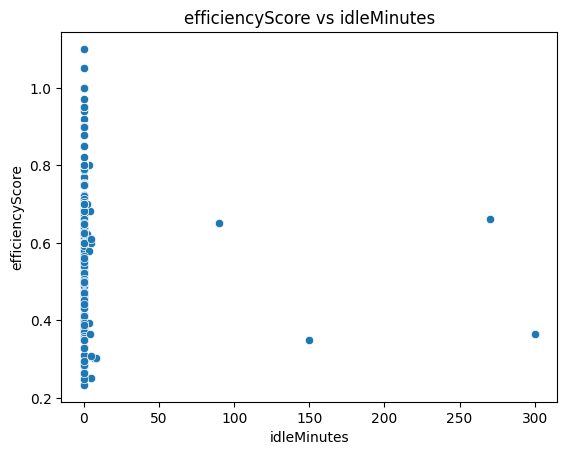

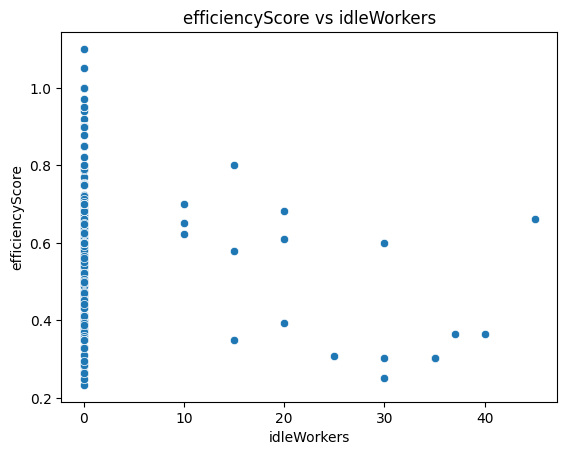

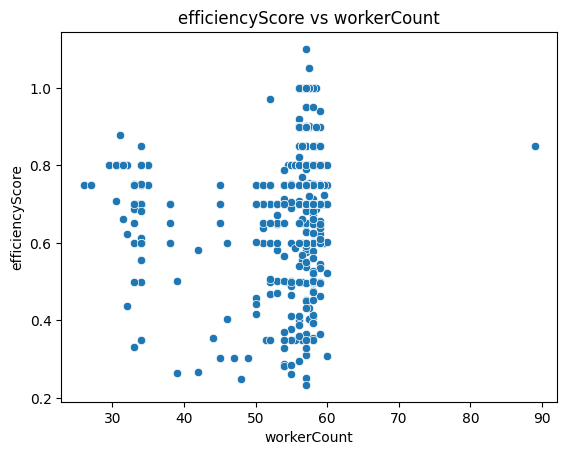

In [243]:
for col in num_cols:
    if col != 'efficiencyScore':
        sns.scatterplot(x=df[col], y=df['efficiencyScore'])
        plt.title(f'efficiencyScore vs {col}')
        plt.show()


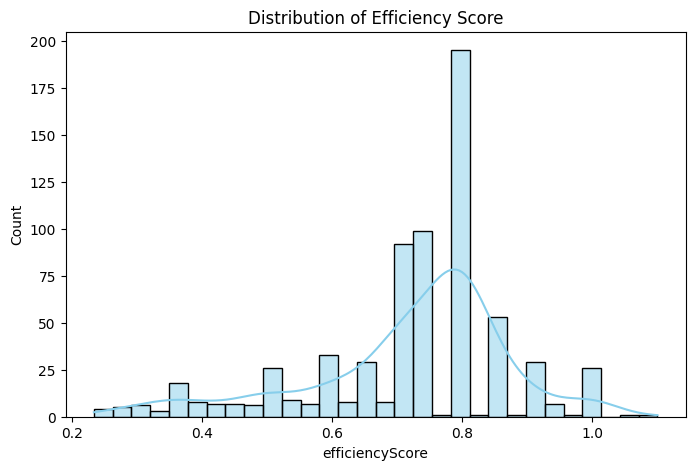

In [244]:
# distribution
plt.figure(figsize=(8,5))
sns.histplot(df['efficiencyScore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Efficiency Score')
plt.show()

* Mostly efficiency score is around 0.8, meaning the majority perform at a similar efficiency level, while only few are significantly less

### Correlation Heatmap
The correlation heatmap helps visualize how features in the dataset relate to each other.  
it is useful for feature selection and detecting multicollinearity.


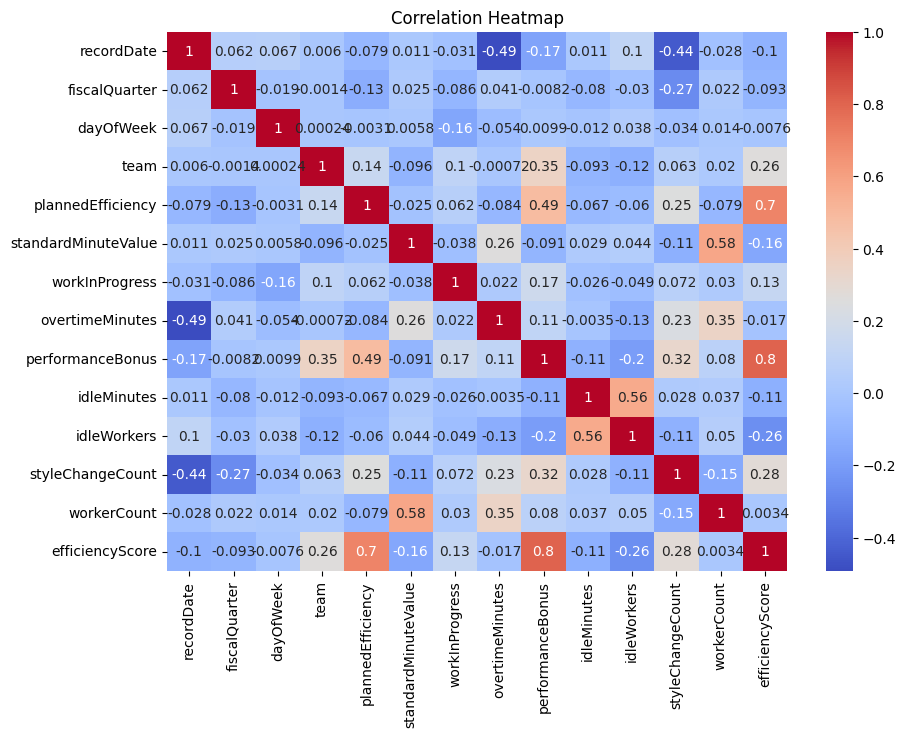

In [245]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*  performance bonuses are strongly associated with efficiency score.
*  PlannedEfficiency are strongly associated with efficiency score.
*  Most features show low correlation with the target — that means problem is complex

### Efficiency by Team

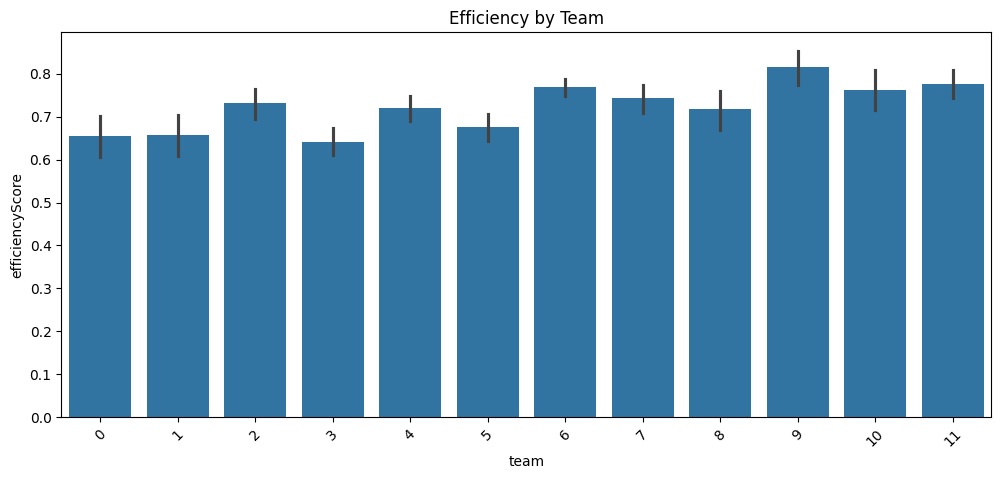

In [246]:
plt.figure(figsize=(12,5))
sns.barplot(x='team', y='efficiencyScore', data=df)
plt.title('Efficiency by Team')
plt.xticks(rotation=45)
plt.show()

### Efficiency Trend over time
visualizes how the average efficiency changes over time.

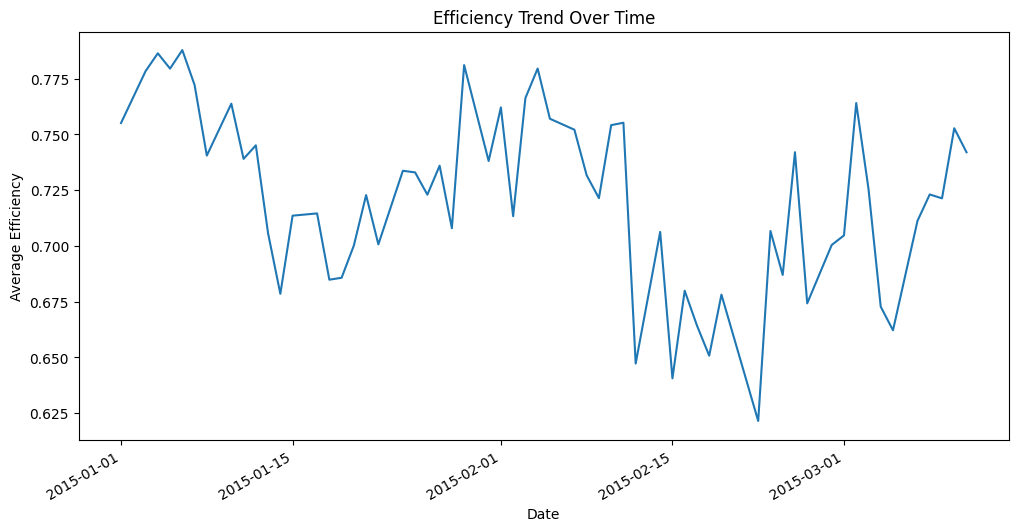

In [247]:
plt.figure(figsize=(12,6))
df.groupby('recordDate')['efficiencyScore'].mean().plot()
plt.title('Efficiency Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Efficiency')
plt.show()

In [248]:
df.head()

,recordDate,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2015-02-24,3,4,9,0.60,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
1,2015-01-19,2,0,4,0.80,11.41,1028.0,4380,50,0.0,0,2,31.0,0.800359
5,2015-02-16,2,0,3,0.80,30.10,461.0,0,0,0.0,0,2,59.0,0.800980
8,2015-01-24,3,1,0,0.65,22.52,1295.0,10170,26,0.0,0,2,56.5,0.650417
9,2015-03-05,0,3,7,0.75,18.79,1228.0,6240,45,0.0,0,2,52.0,0.750396


### Dropped the recordDate column as it is not directly useful for modeling

In [249]:
df = df.drop(['recordDate'], axis=1)

In [250]:
X = df.drop(['efficiencyScore'], axis=1)
y = df['efficiencyScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #              Model Building, Selection, Training, and Evaluation 

#   1)- Linear Regression

#### i)- With Standardization

#### Feature Scaling
We scale features to have mean 0 and standard deviation 1 so that all features contribute equally to the model.

In [251]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [252]:
lr_model_std = LinearRegression()
lr_model_std.fit(X_train_scaled, y_train)
y_pred_std = lr_model_std.predict(X_test_scaled)

print("Linear Regression with standardization:")
print("R² Score:", r2_score(y_test, y_pred_std))
print("MAE:", mean_absolute_error(y_test, y_pred_std))
print("MSE:", mean_squared_error(y_test, y_pred_std))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_std)))

Linear Regression with standardization:
R² Score: 0.710098710876079
MAE: 0.04682811091020937
MSE: 0.005132908176519021
RMSE: 0.07164431712647572


In [253]:
y_train_pred_std = lr_model_std.predict(X_train_scaled)
print("R² Score:", r2_score(y_train, y_train_pred_std))
print("MAE:", mean_absolute_error(y_train, y_train_pred_std))
print("MSE:", mean_squared_error(y_train, y_train_pred_std))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_std)))

R² Score: 0.8142987687222514
MAE: 0.043668074744589676
MSE: 0.004726070118402794
RMSE: 0.06874641894966453


#### ii)- Without Standardization

In [254]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression without standardization")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression without standardization
R² Score: 0.7100987108760979
MAE: 0.04682811091020845
MSE: 0.005132908176518689
RMSE: 0.0716443171264734


### Actual vs Predicted Values
compares the predicted values from the model with the actual values.

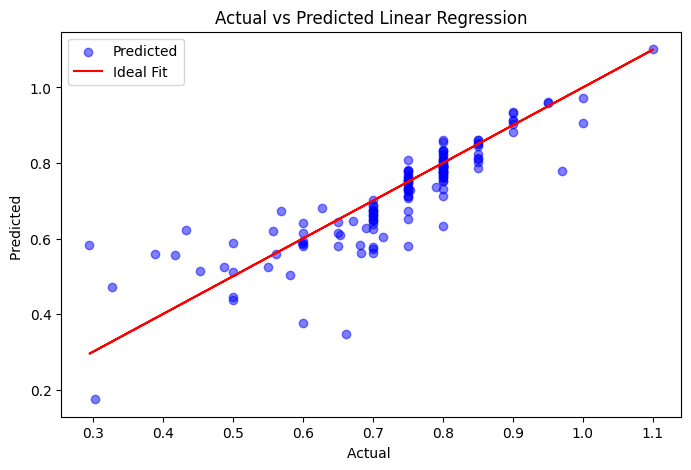

In [255]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=.5, label='Predicted')
plt.plot(y_test, y_test, color='red', label='Ideal Fit')
plt.title('Actual vs Predicted Linear Regression')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.legend()
plt.show()

### Feature Importance
visualizes which features have the most impact on the target variable.

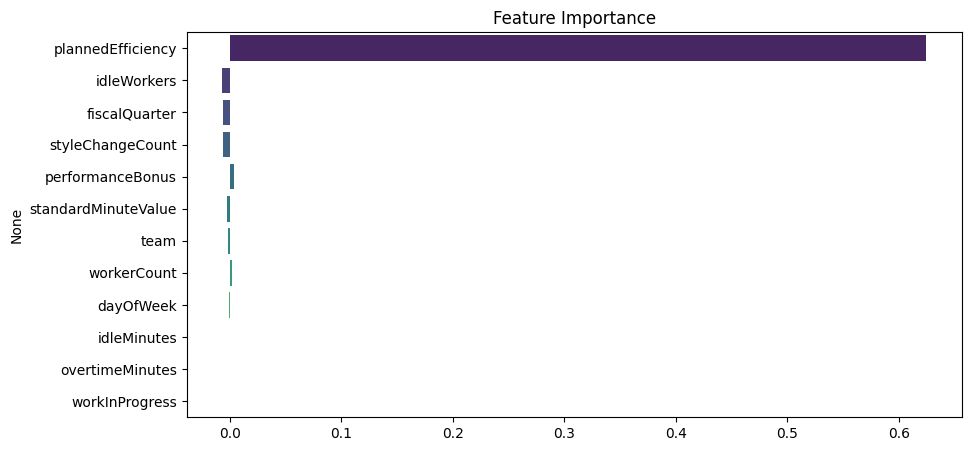

In [256]:
feat_imp = pd.Series(lr_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index,hue=feat_imp.index, palette='viridis')
plt.title("Feature Importance")
plt.show()


# 2)- Randomforest

In [257]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [258]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(" Random Forest Evaluation :")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


 Random Forest Evaluation :
R² Score: 0.7798145416676976
MAE: 0.035459009636546766
MSE: 0.003898539888663111
RMSE: 0.0624382886429722


### Actual vs Predicted values
compares the predicted values from the model with the actual values

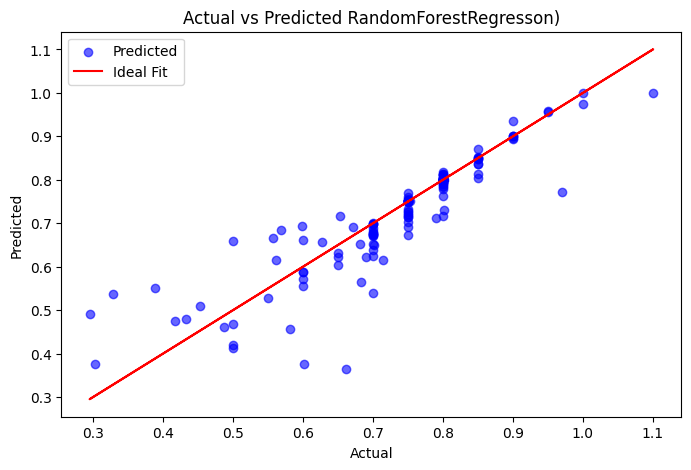

In [259]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6, label='Predicted')
plt.plot(y_test, y_test, color='red', label='Ideal Fit')
plt.title('Actual vs Predicted RandomForestRegresson)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


### 
Feature Importance
visualizes which features have the most impact on the target variable.

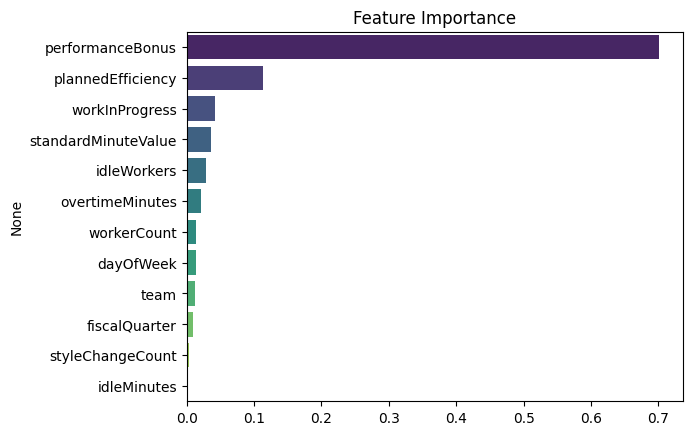

In [260]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp.values, y=feat_imp.index, hue=feat_imp.index, palette='viridis')
plt.title("Feature Importance")
plt.show()

### Residual Plot for Random Forest

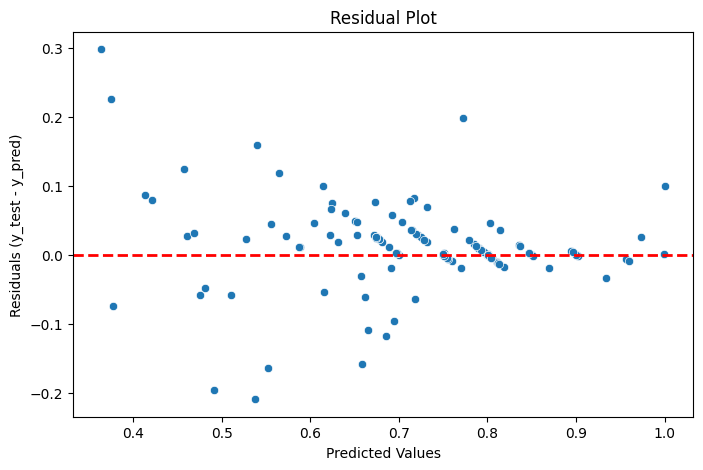

In [261]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


* The residuals are scattered randomly around the zero line, which indicates that the Random Forest model is capturing the underlying patterns well.
* There are no clear patterns or systematic trends, suggesting that the model is not biased

# 3)- XG Boost Regressor

In [262]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.04,
    max_depth=4,
    subsample=0.8,
    random_state=42,
    n_jobs=-1    
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [263]:
print(" XGB:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


 XGB:
R² Score: 0.7610441074385914
MAE: 0.03641134281245213
MSE: 0.004230883755165226
RMSE: 0.06504524390887642


### XGBOOST Hyperparameter Tuning using RandomizedSearchCV

In [264]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],       # number of trees
    'max_depth': [3, 5, 7, 10, 15],             # maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # step size shrinkage
    'subsample': [0.6, 0.8, 1.0],               # fraction of data for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],        # fraction of features for each tree
    'gamma': [0, 0.1, 0.2, 0.5],                # minimum loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],             # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]                # L2 regularization
}

rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,             # number of random combinations to try
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
best_xgb = rand_search.best_estimator_

y_pred = best_xgb.predict(X_test)

print("XGBoost Best Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost Best Model Performance:
R² Score: 0.745266853691579
MAE: 0.03990827376724957
MSE: 0.004510231235839721
RMSE: 0.06715825515779665


### XGBOOST Hyperparameter Tuning using RandomizedSearchCV  on Train data (to check Overfitting)

In [265]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],       # number of trees
    'max_depth': [3, 5, 7, 10, 15],             # maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # step size shrinkage
    'subsample': [0.6, 0.8, 1.0],               # fraction of data for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],        # fraction of features for each tree
    'gamma': [0, 0.1, 0.2, 0.5],                # minimum loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],             # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]                # L2 regularization
}

rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,             # number of random combinations to try
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
best_xgb = rand_search.best_estimator_

y_pred = best_xgb.predict(X_train)

print("XGBoost Best Model Performance:")
print("R² Score:", r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_train, y_pred))
print("MSE:", mean_squared_error(y_train, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost Best Model Performance:
R² Score: 0.9997794006789376
MAE: 0.0014947366496901719
MSE: 5.614221576450171e-06
RMSE: 0.002369434864361156


###  Actual vs Predicted Scatter Plot
compares the predicted values from the model with the actual values

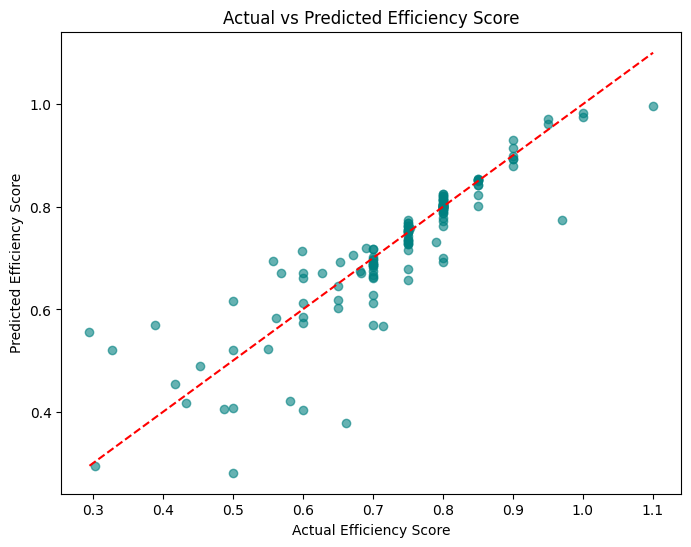

In [266]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Efficiency Score')
plt.ylabel('Predicted Efficiency Score')
plt.title('Actual vs Predicted Efficiency Score')
plt.show()


### XGBoost feature importance

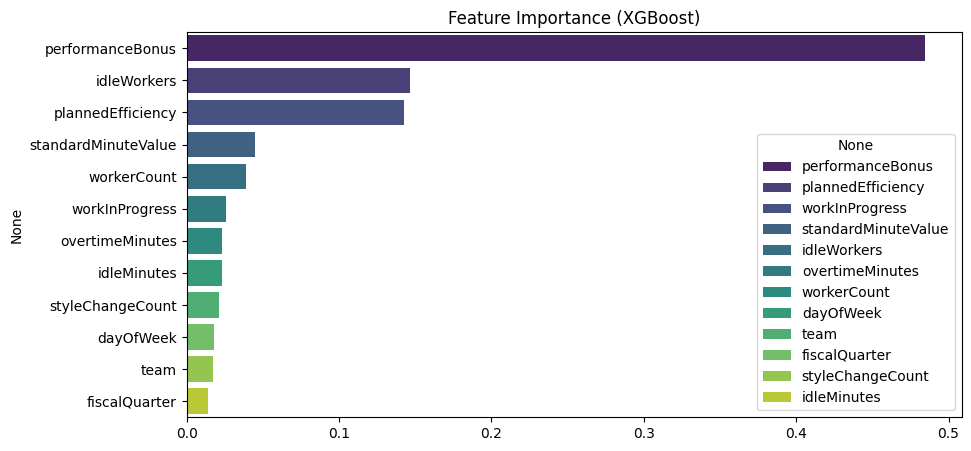

In [267]:
xgb_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=xgb_imp.values, y=xgb_imp.index, hue=feat_imp.index, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.show()


### Residual Plot for XGboost

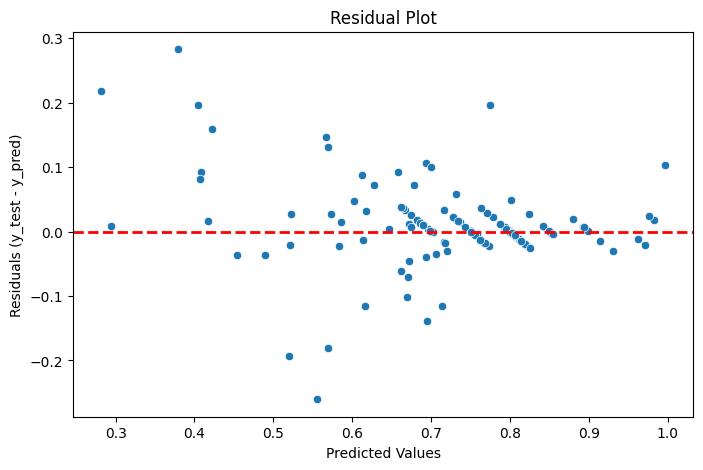

In [268]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


In [269]:
sample_point = [2, 2, 4, 0.8, 11.41, 1028.0, 4380, 50, 0.0, 0, 2, 31.0]                # Actual value - 0.80

# Convert to 2D array (1 sample, 13 features)
sample_array = np.array(sample_point).reshape(1, -1)

predicted_value_lr = lr_model.predict(sample_array)
print("Predicted target by LinearRegression:", predicted_value_lr[0])

predicted_value_rf = rf_model.predict(sample_array)
print("Predicted target by RandomForestRegressor:", predicted_value_rf[0])

predicted_value_xgb = xgb_model.predict(sample_array)
print("Predicted target by XGBoost:", predicted_value_xgb[0])

Predicted target by LinearRegression: 0.7958626266747109
Predicted target by RandomForestRegressor: 0.8019331802100005
Predicted target by XGBoost: 0.80079377


C:\Users\rajpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rajpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
